In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")

In [7]:
dataframe=pd.read_csv("D:\Depi\prog-data1\heart_data.csv")

In [8]:
dataframe.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [10]:
dataframe.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#drop the index and id from the dataset that has no impact on the target variable
dataframe.drop(["index", "id"], axis=1, inplace=True)

In [12]:
dataframe.shape

(70000, 12)

In [13]:
print(dataframe.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [14]:
dataframe.duplicated().sum()

24

In [15]:
#remove the duplicate values from the dataset
dataframe.drop_duplicates(inplace=True)

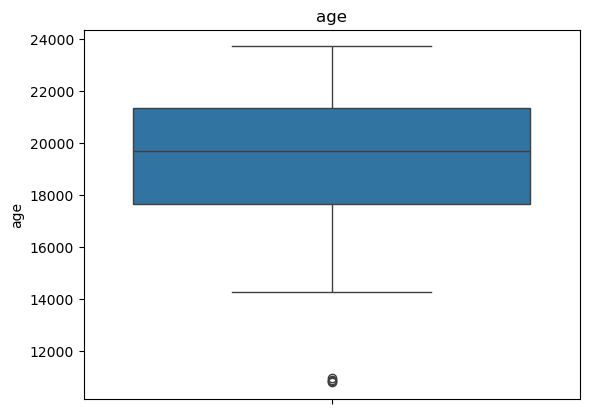

Min value for age: 10798
Max value for age: 23713


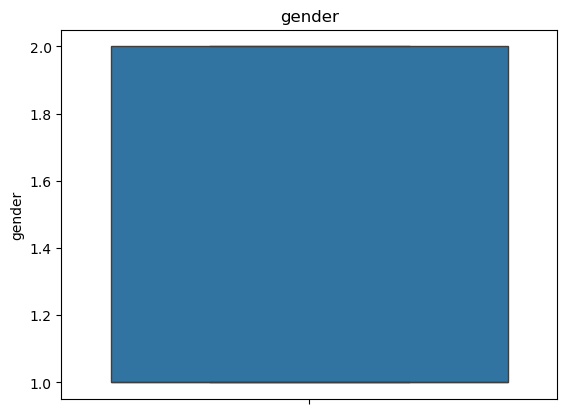

Min value for gender: 1
Max value for gender: 2


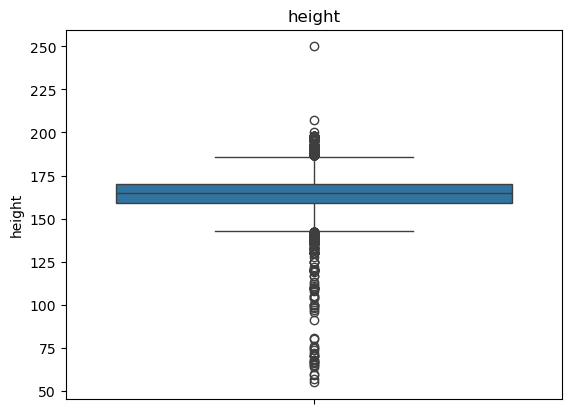

Min value for height: 55
Max value for height: 250


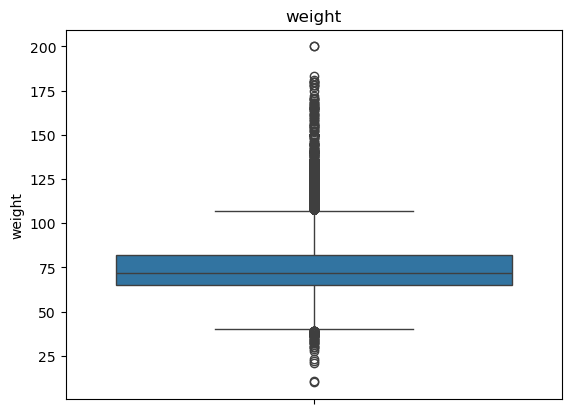

Min value for weight: 10.0
Max value for weight: 200.0


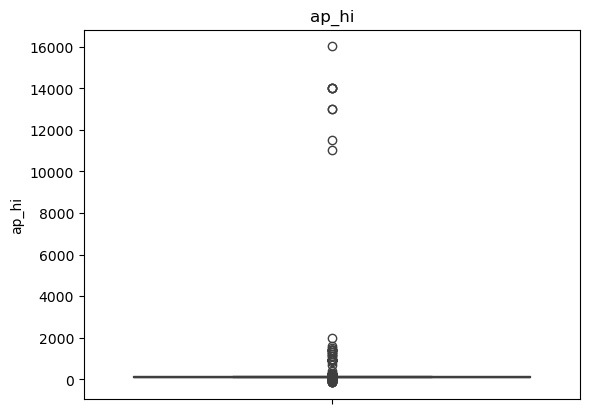

Min value for ap_hi: -150
Max value for ap_hi: 16020


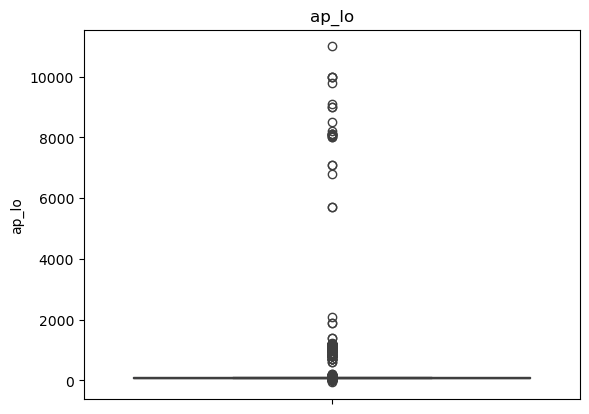

Min value for ap_lo: -70
Max value for ap_lo: 11000


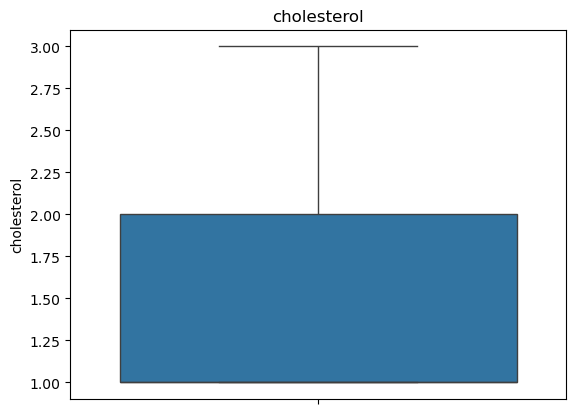

Min value for cholesterol: 1
Max value for cholesterol: 3


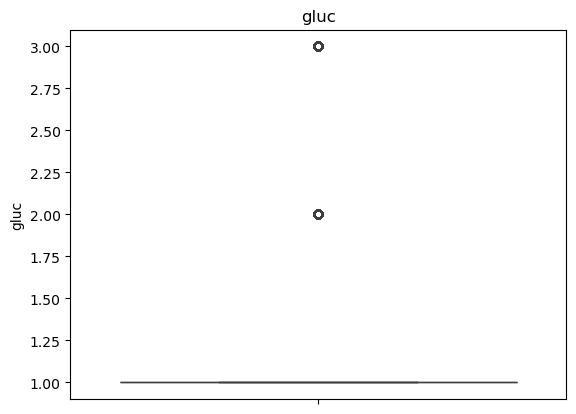

Min value for gluc: 1
Max value for gluc: 3


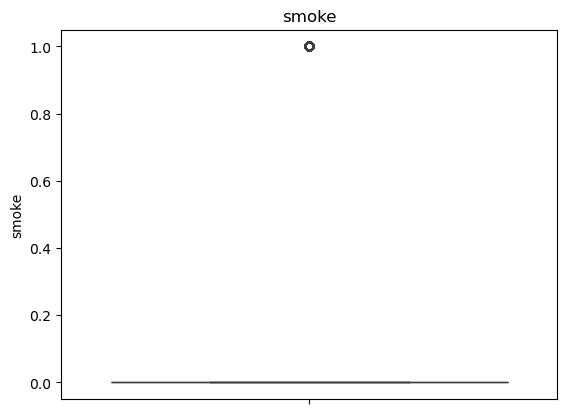

Min value for smoke: 0
Max value for smoke: 1


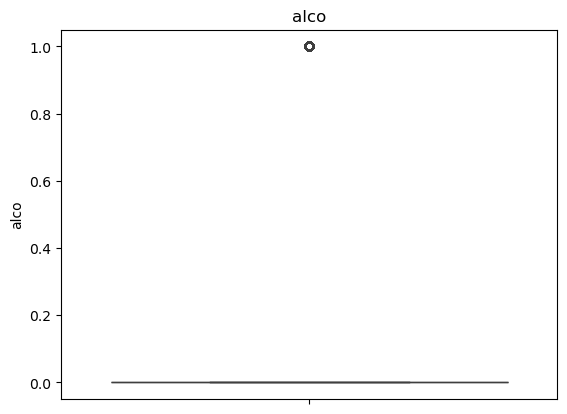

Min value for alco: 0
Max value for alco: 1


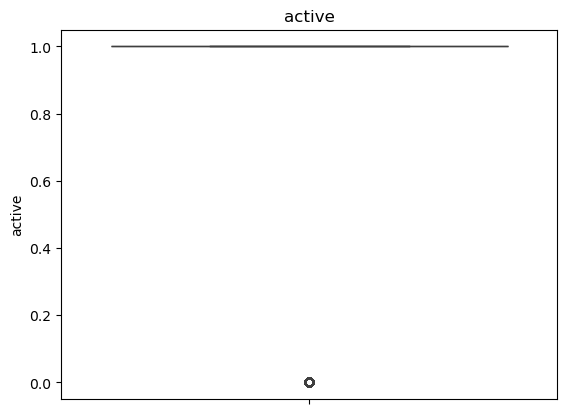

Min value for active: 0
Max value for active: 1


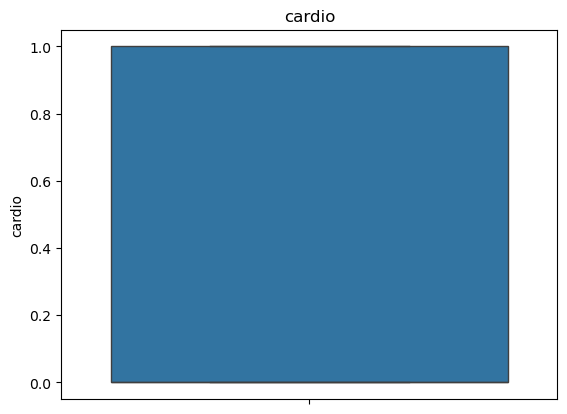

Min value for cardio: 0
Max value for cardio: 1


In [16]:
for col in dataframe.columns:
    sns.boxplot(y=dataframe[col])
    plt.title(col)
    plt.show()
    min_val = dataframe[col].min()
    max_val = dataframe[col].max()
    print(f"Min value for {col}: {min_val}")
    print(f"Max value for {col}: {max_val}")

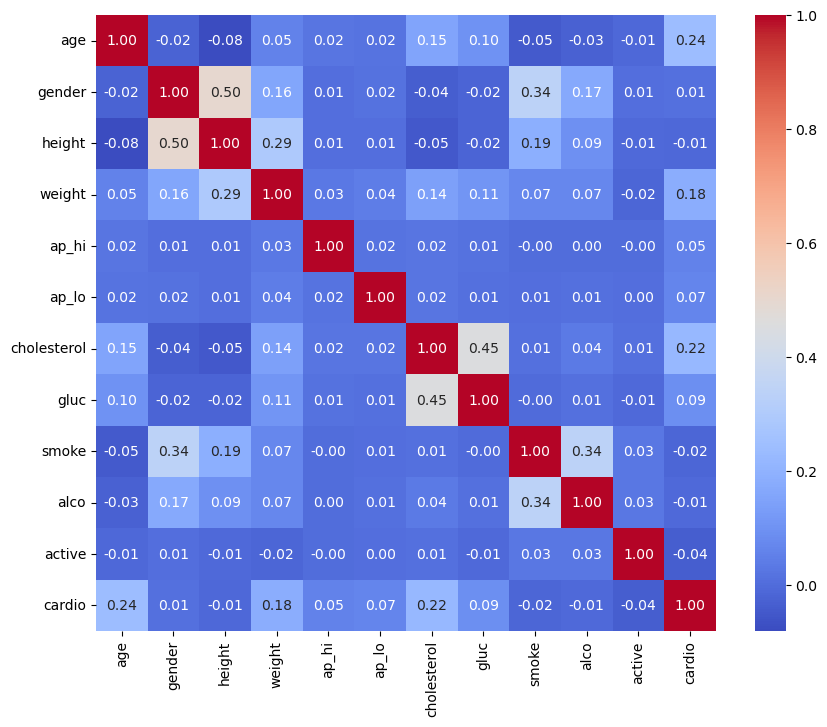

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(dataframe.corr(), annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

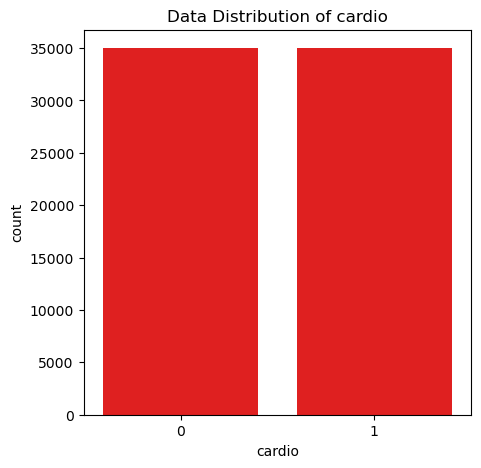

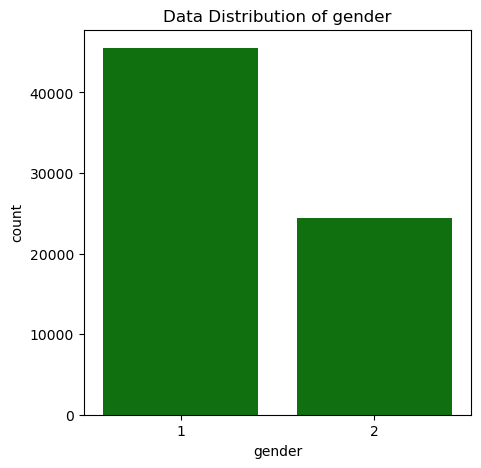

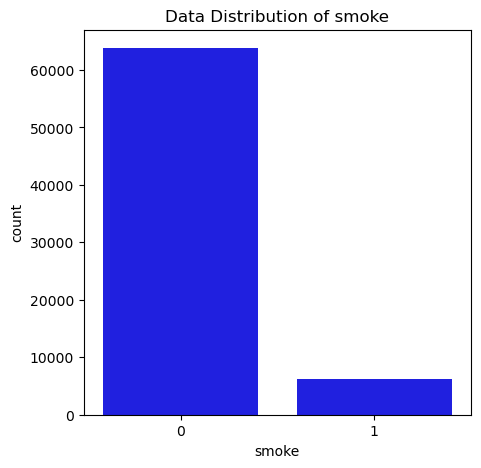

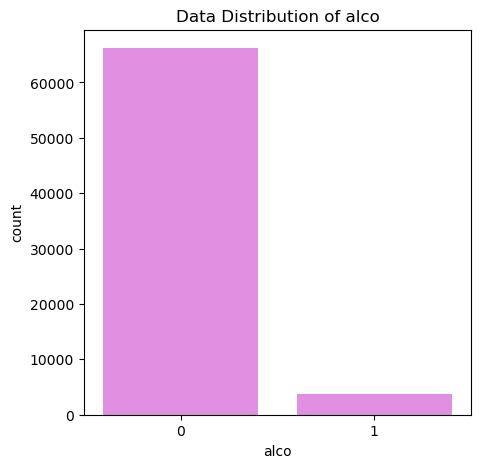

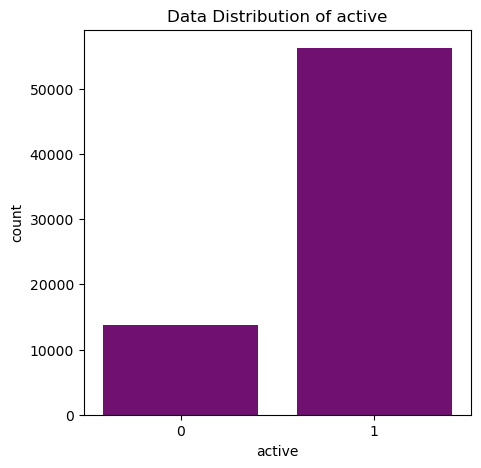

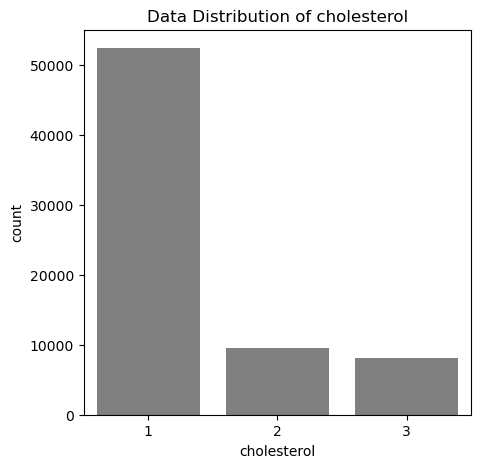

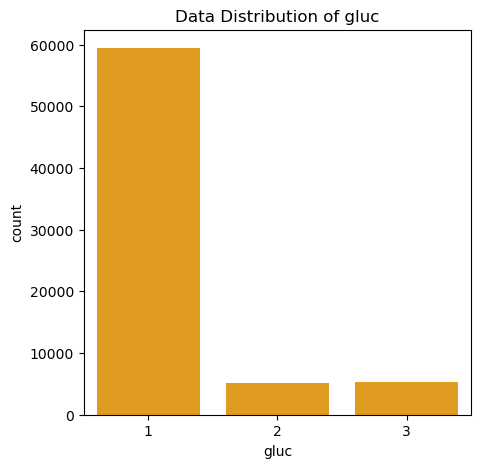

In [19]:
color_list=["red", "green", "blue","violet","purple","grey","orange"]
col_list=["cardio", "gender", "smoke","alco","active", "cholesterol","gluc"]
for i in range(len(col_list)):
    plt.figure(figsize=(5,5))
    sns.countplot(data=dataframe, x=dataframe[col_list[i]], color=color_list[i])
    plt.title(f"Data Distribution of {col_list[i]}")
    plt.show()

In [20]:
# The age is in 1000's lets convert it into hundred's
dataframe["age"]=df_cleaned["age"]/1000
dataframe["age"]

0        18.393
1        20.228
2        18.857
3        17.623
4        17.474
          ...  
69995       NaN
69996       NaN
69997       NaN
69998    22.431
69999    20.540
Name: age, Length: 69976, dtype: float64

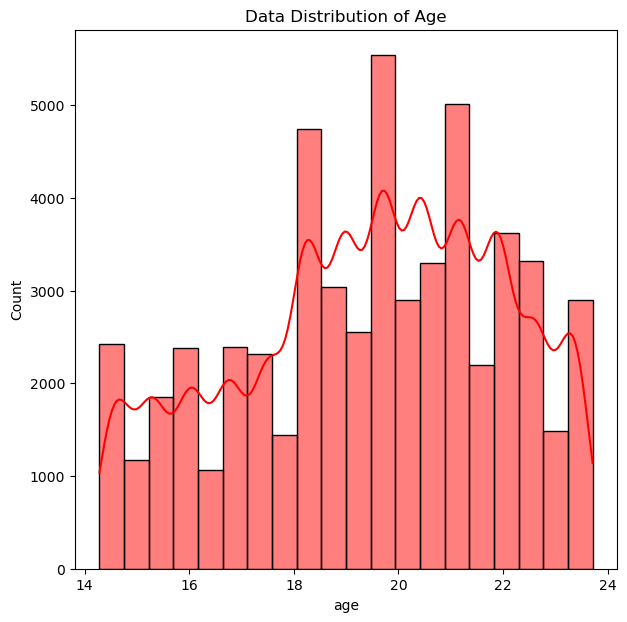

In [21]:
# distribution of age 
plt.figure(figsize=(7,7))
sns.histplot(x=dataframe["age"], kde=True, color="red", bins=20)
plt.title("Data Distribution of Age")
plt.show()

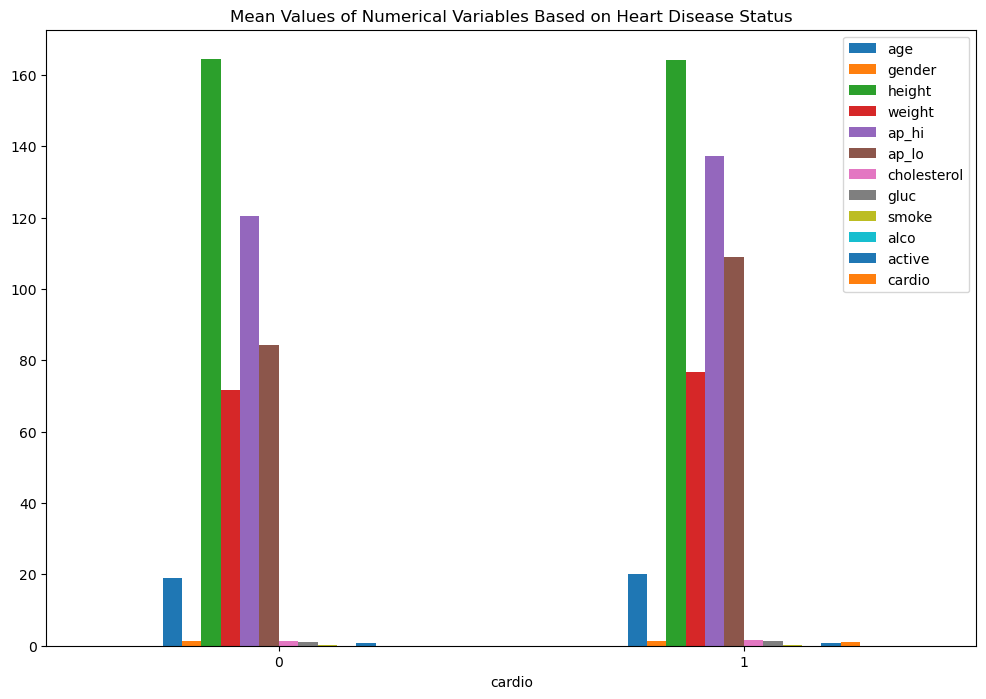

In [22]:
heart_disease_grouped = dataframe.groupby('cardio')[dataframe.columns].mean()
heart_disease_grouped.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Values of Numerical Variables Based on Heart Disease Status')
plt.xticks(rotation=0)
plt.show()

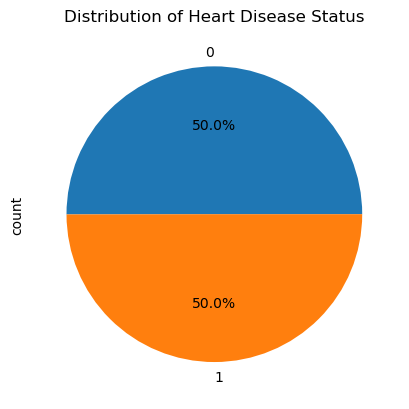

In [23]:
dataframe['cardio'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Heart Disease Status')
plt.show()

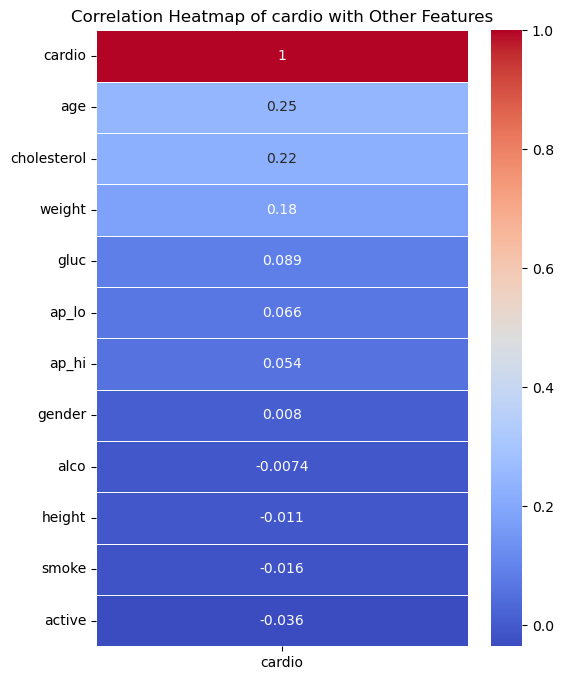

In [24]:
target_column = 'cardio'
corr_matrix = dataframe.corr()[[target_column]].sort_values(by=target_column, ascending=False)
plt.figure(figsize=(6, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Heatmap of {target_column} with Other Features')
plt.show()

In [74]:
X = dataframe.drop(columns=['cardio'])  # استبدل 'target' باسم عمود التصنيف في بياناتك
y = dataframe['cardio']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات (تحويلها لمجال قياسي)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))


In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# بناء النموذج
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(11,)),  # الطبقة الأولى (64 نيوترون + ReLU)
    layers.Dense(32, activation='relu'),  # الطبقة الثانية
    layers.Dense(1, activation='sigmoid')  # الطبقة الأخيرة (للخروج في حالة التصنيف الثنائي)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# عرض ملخص النموذج
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6653 - loss: 0.6130 - val_accuracy: 0.7199 - val_loss: 0.6047
Epoch 2/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7276 - loss: 0.5631 - val_accuracy: 0.7219 - val_loss: 0.5831
Epoch 3/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7304 - loss: 0.5531 - val_accuracy: 0.7233 - val_loss: 0.5631
Epoch 4/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7318 - loss: 0.5480 - val_accuracy: 0.7228 - val_loss: 0.5582
Epoch 5/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7342 - loss: 0.5431 - val_accuracy: 0.7237 - val_loss: 0.5566
Epoch 6/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7291 - loss: 0.5468 - val_accuracy: 0.7254 - val_loss: 0.5570
Epoch 7/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7327 - loss: 0.5428 - val_accuracy: 0.7267 - val_loss: 0.5566
Epoch 8/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7342 - loss: 0.5412 - 

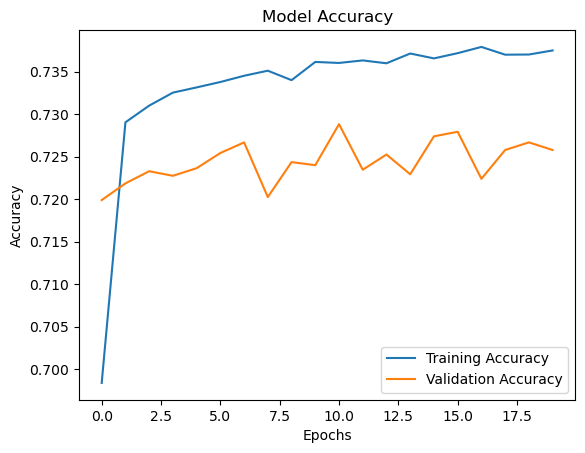

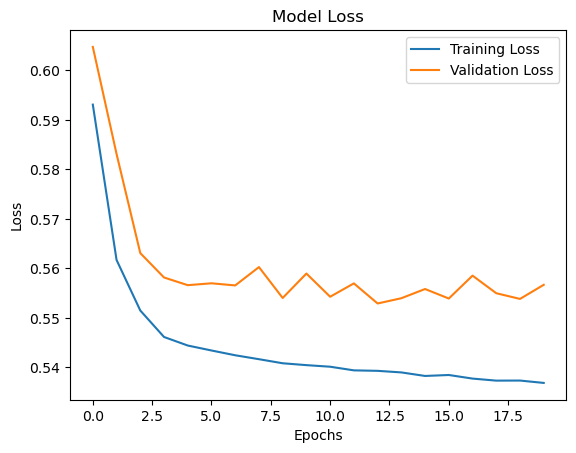

In [82]:
import matplotlib.pyplot as plt

# رسم منحنى الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# رسم منحنى الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


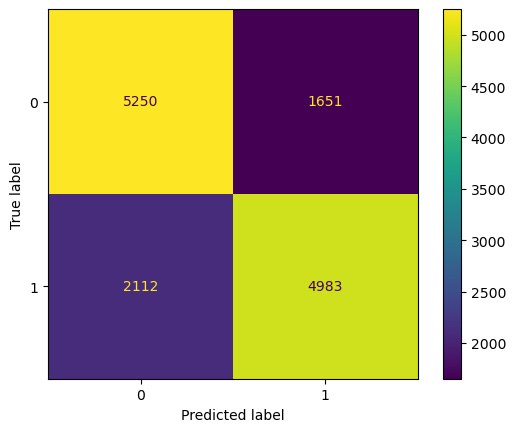

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [85]:
new_data = X_train[0:1]  # مثال لبيانات جديدة بنفس عدد الميزات (11)
new_data = scaler.transform(new_data)  # تطبيق نفس `scaler`
prediction = model.predict(new_data)

print("التنبؤ:", prediction)  # ستكون القيمة بين 0 و 1 (للتصنيف الثنائي)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
التنبؤ: [[4.5559256e-05]]


In [87]:
# إنشاء مجلد لحفظ النموذج
import os
output_dir = "output_model"
os.makedirs(output_dir, exist_ok=True)
model_path = os.path.join(output_dir, "trained_model.h5")
model.save(model_path)
print(f"Model saved at: {model_path}")

Model saved at: output_model\trained_model.h5


# 📌 Documentation: How to Use the Model

1️⃣ **Training the Model:**
   - The model is trained using `model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)`.
   - Uses EarlyStopping and ReduceLROnPlateau for better performance.

2️⃣ **Evaluating the Model:**
   - Call `model.evaluate(X_test, y_test)` to get the loss and accuracy.

3️⃣ **Saving & Loading the Model:**
   - The trained model is saved in `output_model/trained_model.h5`.
   - To load the model in a new script:
     ```python
     from tensorflow.keras.models import load_model
     model = load_model("output_model/trained_model.h5")
     ```

4️⃣ **Making Predictions:**
   - Use `model.predict(new_data)` where `new_data` is a NumPy array with the same input shape.
"""
